In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def draw(G, **args):
    nx.draw(G, with_labels=True, font_size=8, **args)
    plt.show()

def component(G, N, i):
    C = []
    S = []
    S.append(i)
    N.remove(i)
    while S:
        node = S.pop()
        C.append(node)
        for j in G[node]:
            if j in N:
                N.remove(j)
                S.append(j)
    return C

def components(G):
    C = []
    N = set(G)
    while N:
        C.append(component(G, N, next(iter(N))))
    return C

Finished building


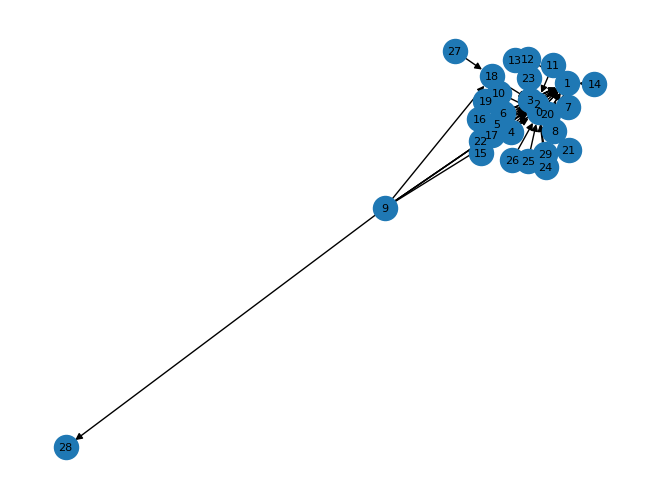

First
{0, 1, 2, 4}
Second
{0, 1, 2, 4}
First
{3, 5}
Second
{3}
First
{6}
Second
{6}
First
{7}
Second
{7}
First
{8}
Second
{8}
First
{9, 18, 28}
Second
{9}
First
{10}
Second
{10}
First
{11}
Second
{11}
First
{12}
Second
{12}
First
{13}
Second
{13}
First
{14}
Second
{14}
First
{15}
Second
{15}
First
{16}
Second
{16}
First
{17}
Second
{17}
First
{19}
Second
{19}
First
{20}
Second
{20}
First
{21}
Second
{21}
First
{22}
Second
{22}
First
{23}
Second
{23}
First
{24}
Second
{24}
First
{25}
Second
{25}
First
{26}
Second
{26}
First
{18, 27}
Second
{18, 27}
First
{29}
Second
{29}
First
{5}
Second
{5}
First
{28}
Second
{28}

26
4


In [65]:
def component_directed(G, N, i, correct):
    C = set()
    S = []
    S.append(i)
    N.remove(i)
    while S:
        node = S.pop()
        C.add(node)
        neighbours = G.successors(node)
        if correct:
            neighbours = G.successors(node)
        else:
            neighbours = G.predecessors(node)
        #print(f"Node {G[node]}")
        #for j in neighbours:
        #    print(G[j])
        for j in neighbours:
            if j in N:
                N.remove(j)
                S.append(j)
    return C

def components_directed(G):
    C = []
    N = set(G)
    while N:
        first = component_directed(G, N, next(iter(N)), correct=True)
        print("First")
        print(first)
        second = component_directed(G, first, next(iter(first)), correct=False)
        print("Second")
        print(second)
        C.append(second)
        N.update(first)
    return C

D2 = nx.scale_free_graph(30)
print("Finished building")
draw(D2)
scc_mine = sorted(components_directed(D2), key=len, reverse=True)
lengths = [len(c) for c in scc_mine]
print()
print(len(lengths))
print(lengths[0])

In [54]:
#D = nx.read_pajek('enron.net')
D = nx.scale_free_graph(15)
n = len(D)
m = D.number_of_edges()
print(n)
print(m)
lengths_mine = [len(c) for c in sorted(components_directed(D), key=len, reverse=True)]
lengths_nx = [len(c) for c in sorted(nx.strongly_connected_components(D), key=len, reverse=True)]
print(f"Mine: {len(lengths_mine)}, {lengths_mine[0]}")
print(f"Networkx: {len(lengths_nx)}, {lengths_nx[0]}")

15
35
Mine: 11, 4
Networkx: 12, 4


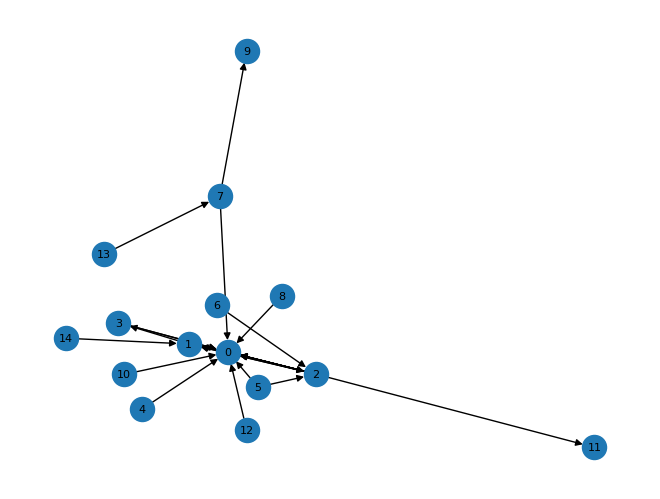

First
{0, 1, 2, 3, 11}
Second
{0, 1, 2, 3}
First
{4}
Second
{4}
First
{5}
Second
{5}
First
{6}
Second
{6}
First
{9, 7}
Second
{9, 7}
First
{8}
Second
{8}
First
{10}
Second
{10}
First
{12}
Second
{12}
First
{13}
Second
{13}
First
{14}
Second
{14}
First
{11}
Second
{11}
[{0, 1, 2, 3}, {9, 7}, {4}, {5}, {6}, {8}, {10}, {12}, {13}, {14}, {11}]
[{0, 1, 2, 3}, {11}, {4}, {5}, {6}, {9}, {7}, {8}, {10}, {12}, {13}, {14}]


In [74]:
draw(D)
print(sorted(components_directed(D), key=len, reverse=True))
print(sorted(nx.strongly_connected_components(D), key=len, reverse=True))

In [72]:
print(D[7])
print(D[9])

{0: {0: {}}, 9: {0: {}}}
{}


In [51]:
print(sum(lengths))

87273


In [ ]:
G = nx.read_pajek('collaboration_imdb.net')
#G = nx.read_pajek('karate_club.net')
#draw(G)
cc_nx = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
print(cc_nx)
print(len(cc_nx))


In [ ]:
cc_mine = [len(c) for c in sorted(components(G), key=len, reverse=True)]
print(cc_nx)
print(len(cc_nx))